# Seaborn 한번에 제대로 배우기


## Seaborn 특징

* 여러 변수 간의 관계를 검사하기 위한 데이터 집합 지향 API
* 범주형 변수를 사용하여 관측치 또는 집계 통계량을 표시하기 위한 전문적인 지원
* 일변량 또는 이변량 분포를 시각화하고 데이터의 부분 집합 간 비교하기 위한 옵션
* 서로 다른 종류의 종속 변수에 대한 선형 회귀 모형의 자동 추정 및 표시
* 복잡한 데이터셋의 전체 구조에 대한 편리한 보기
* 복잡한 시각화를 쉽게 구축할 수 있는 다중 플롯 그리드 구조를 위한 높은 수준의 추상화
* 여러 테마가 내장된 matplotlib 그림 스타일링 제어
* 데이터의 패턴을 충실히 나타내는 색상 팔레트 선택 도구

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.__version__

'0.11.0'

In [2]:
import warnings

warnings.filterwarnings(action='ignore') 

## 산점도(Scatter Plot)

In [3]:
penguins = sns.load_dataset('penguins')
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


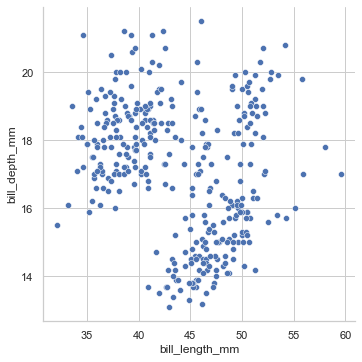

In [4]:
sns.relplot(x='bill_length_mm', y='bill_depth_mm', data=penguins);

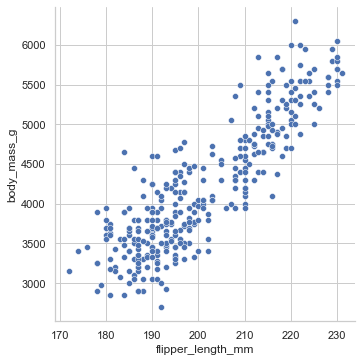

In [5]:
sns.relplot(x='flipper_length_mm', y='body_mass_g', data=penguins);

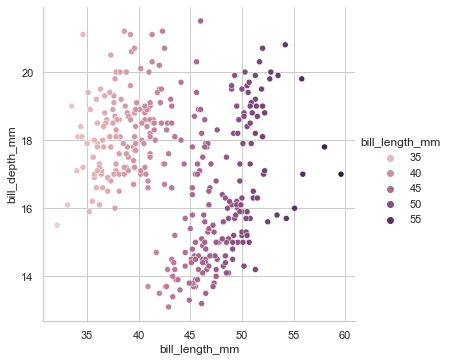

In [6]:
sns.relplot(x='bill_length_mm', y='bill_depth_mm', 
            hue='bill_length_mm', data=penguins);

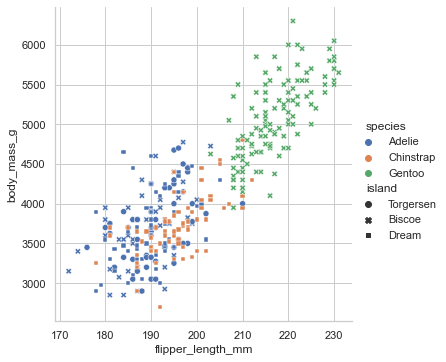

In [7]:
sns.relplot(x='flipper_length_mm', y='body_mass_g', 
            hue='species', style='island',data=penguins);

### col

위처럼 그릴씨 가독성이 떨어지므로 style 로 구분하는거 대신에  
col 을 사용해서 따로 나타내어 보자

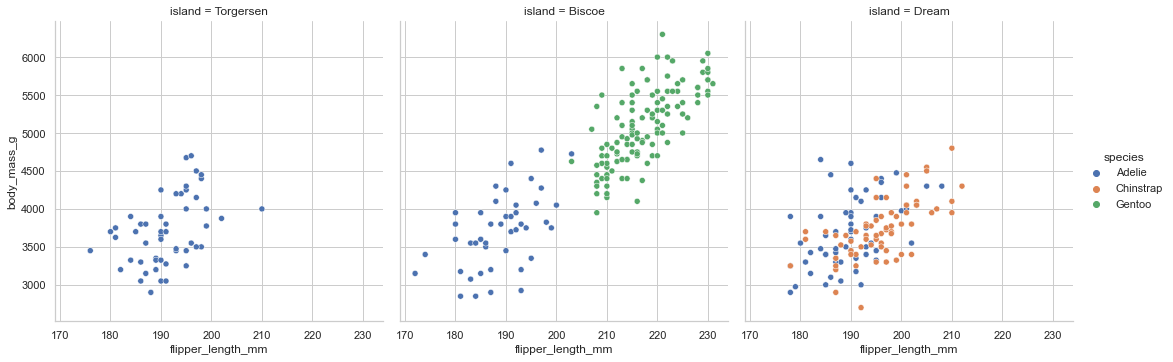

In [8]:
sns.relplot(x='flipper_length_mm', y='body_mass_g', 
            hue='species', col='island',data=penguins);

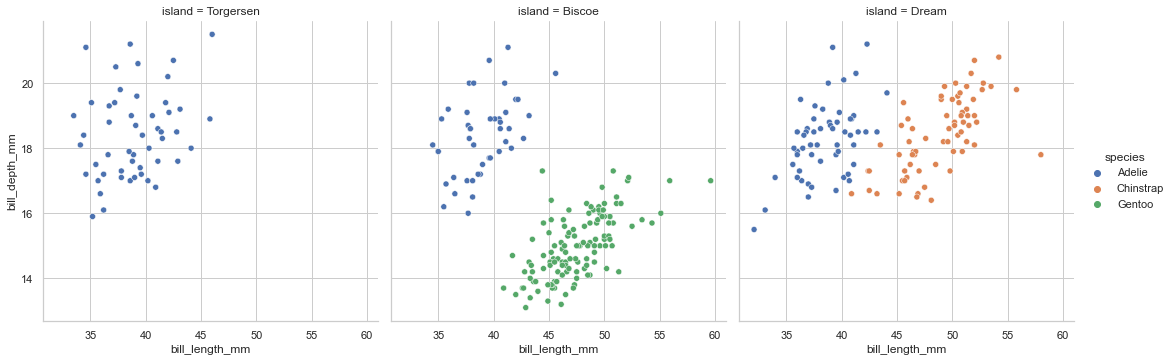

In [9]:
sns.relplot(x='bill_length_mm', y='bill_depth_mm', 
            hue='species', col='island', data=penguins);

### size 
다른 구별법 size 를 사용하여 지정

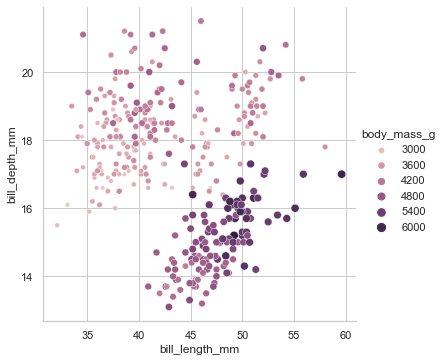

In [10]:
sns.relplot(x='bill_length_mm', y='bill_depth_mm', 
            hue='body_mass_g', size='body_mass_g', data=penguins);

## size 수동 조절

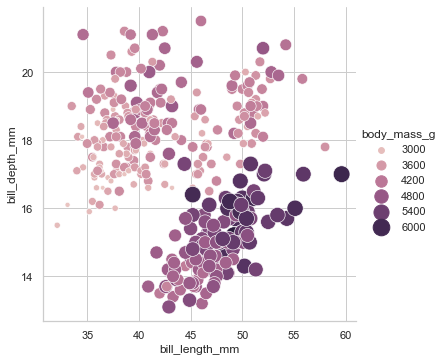

In [11]:
sns.relplot(x='bill_length_mm', y='bill_depth_mm', 
            hue='body_mass_g', size='body_mass_g',
            sizes=(10, 300), data=penguins);

In [12]:
flights = sns.load_dataset('flights')
flights.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


## 라인 플롯(Line Plot)

sns.relplot(kind='line')

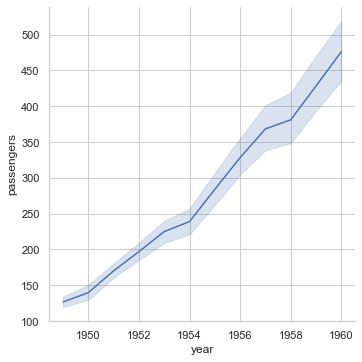

In [13]:
sns.relplot(x='year', y='passengers', kind='line', data=flights);

In [14]:
dots = sns.load_dataset('dots')
dots.head(3)

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840


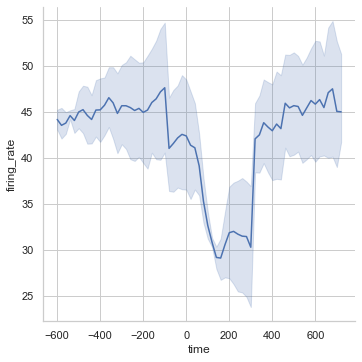

In [15]:
sns.relplot(x='time', y= 'firing_rate',
            kind='line', data=dots);

### 신뢰구간 95% 을 보여주는 범위

ci=None

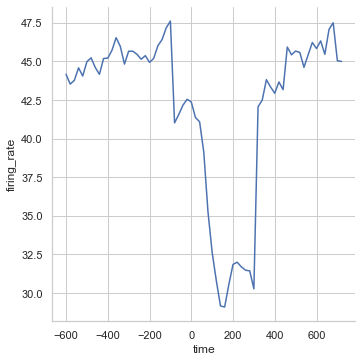

In [16]:
sns.relplot(x='time', y= 'firing_rate',
            ci=None, kind='line', data=dots);

ci = 95% : 신뢰구간(95%) default   
ci = sd : 표준편차
ci = None " 제거

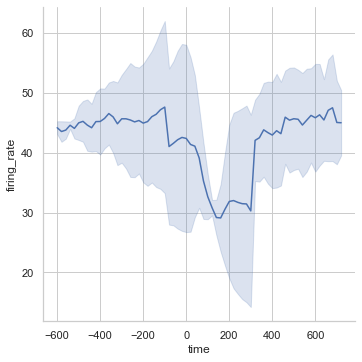

In [17]:
sns.relplot(x='time', y= 'firing_rate',
            ci='sd', kind='line', data=dots);

### estimator 
실제 값

estimator를 None 으로 했을때에는 실제값을 보여주게된다. 

위의 그래프와 아래의 그래프를 비교해보면 위에는 통계값을 범위로 표현하여 중심선(평균?!)을 나타 낸 것이고, 아래는 포인트와 포인트를 연결한 선이다. 

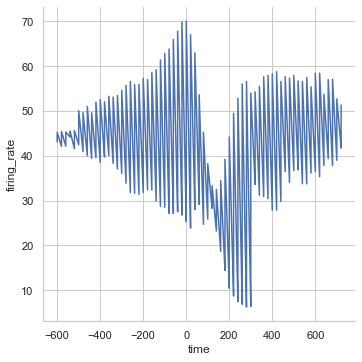

In [18]:
sns.relplot(x='time', y= 'firing_rate',
            estimator=None, kind='line', data=dots);

### hue

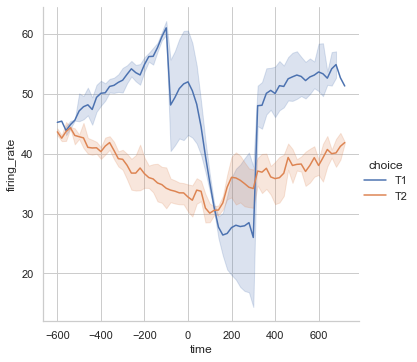

In [19]:
sns.relplot(x='time', y='firing_rate',
            hue='choice', kind='line', data=dots);

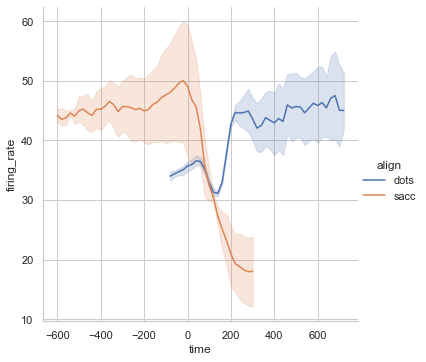

In [20]:
sns.relplot(x='time', y='firing_rate',
            hue='align', kind='line', data=dots);

### style

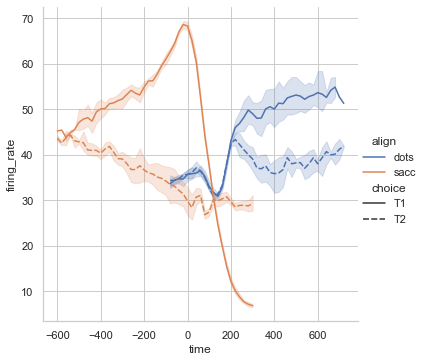

In [21]:
sns.relplot(x='time', y='firing_rate',
           hue='align', style='choice',
           kind='line', data=dots);

### markers

* dashes 역활?!

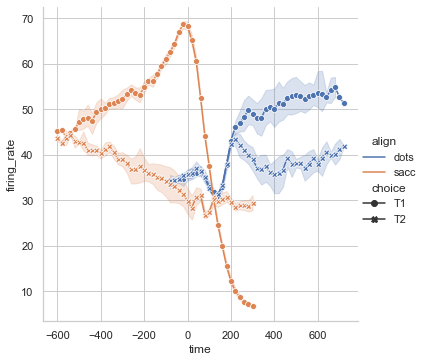

In [22]:
sns.relplot(x='time', y='firing_rate',
           hue='align', style='choice',
            dashes=False, markers=True,
           kind='line', data=dots);

####  col

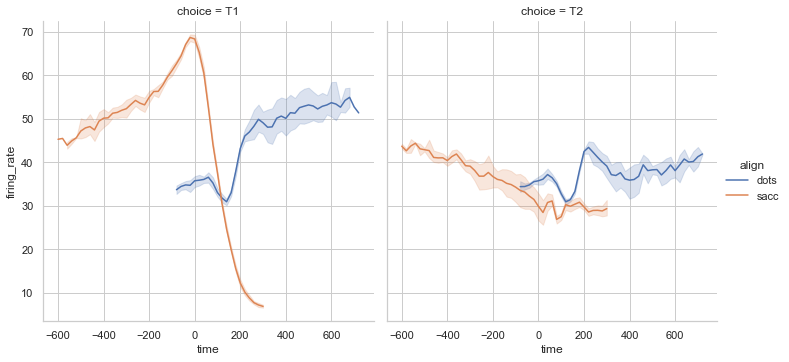

In [23]:
sns.relplot(x='time', y='firing_rate',
           hue='align', col='choice',
           kind='line', data=dots);

### query

세분화 하는 방법

data에서 query를 날려서 부분만을 취합하면 바로 정보를 알수있다.

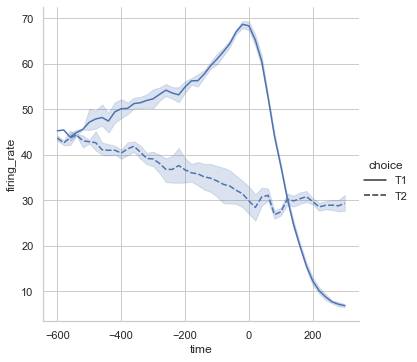

In [24]:
sns.relplot(x='time', y='firing_rate',
            style='choice',
           kind='line', data=dots.query("align == 'sacc'"));

### hue를 사용하여서 세밀한 조정

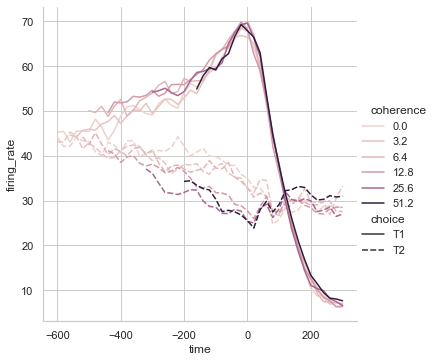

In [25]:
sns.relplot(x='time', y='firing_rate',
            hue='coherence', style='choice',
           kind='line', data=dots.query("align == 'sacc'"));

####  col

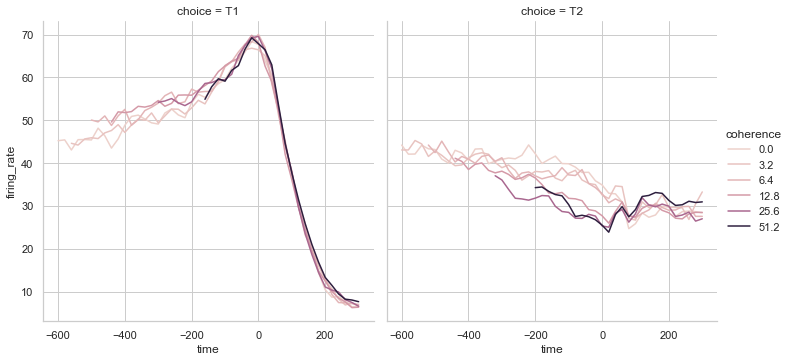

In [26]:
sns.relplot(x='time', y='firing_rate',
            hue='coherence', col='choice',
           kind='line', data=dots.query("align == 'sacc'"));

In [27]:
fmri = sns.load_dataset('fmri')
fmri.head(3)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033


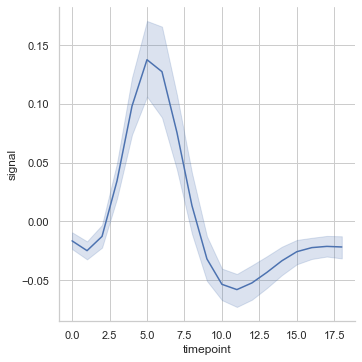

In [28]:
sns.relplot(x='timepoint', y='signal',
           kind='line', data=fmri);

### sort

seaborn 은 x 축의 데이터를 sort을 자동으로 지원해 준다. 

x 축의 데이터가 중구난방이어도 오름 차순으로 배열하여 line 그래프를 그리는데, 때로는 필요 없을때에도 있다.

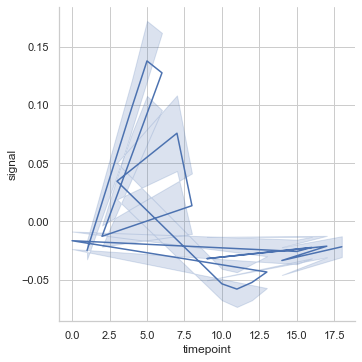

In [29]:
sns.relplot(x='timepoint', y='signal',
            sort=False,
           kind='line', data=fmri);

### size

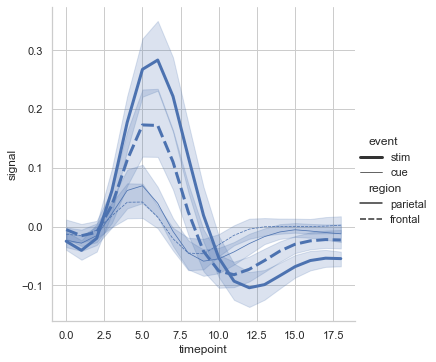

In [30]:
sns.relplot(x='timepoint', y='signal',
            style='region', size='event',
            kind='line', data=fmri);

### 좋은 그래프를 찾는 방법
위와 같은 형식으 보기 불편하기때문에 피해야한다. 

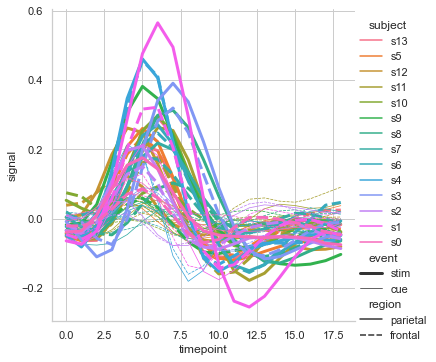

In [31]:
sns.relplot(x='timepoint', y='signal',
            style='region',hue='subject', size='event',
            kind='line', data=fmri);

위에는 너무 복잡하고,   
아래는 너무 많다.

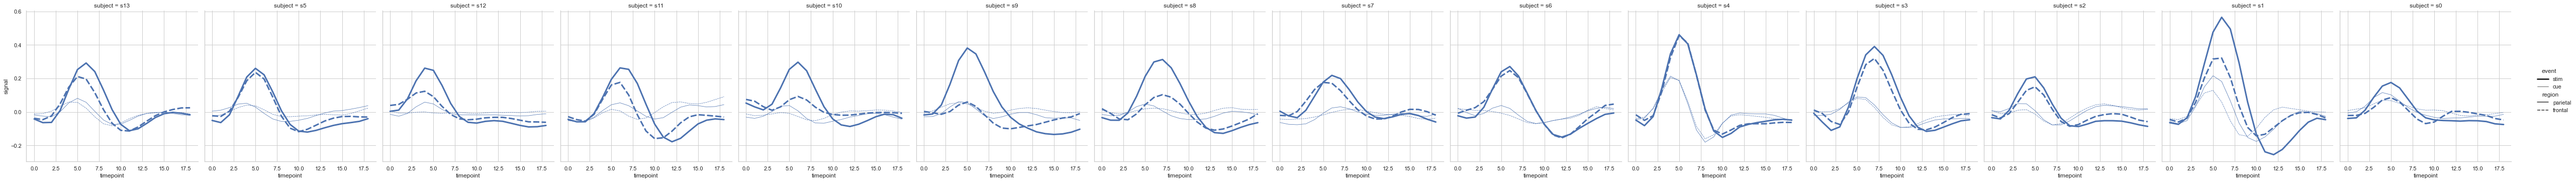

In [32]:
sns.relplot(x='timepoint', y='signal',
            style='region',col='subject',
            size='event',
            kind='line', data=fmri);

그나마 나아졌지만, 아직 너무 복잡하다. 

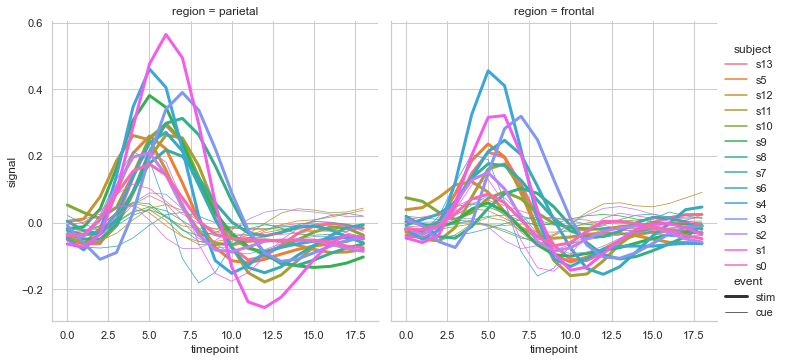

In [33]:
sns.relplot(x='timepoint', y='signal',
            hue='subject', col='region',
            size='event',
            kind='line', data=fmri);

####  palette 

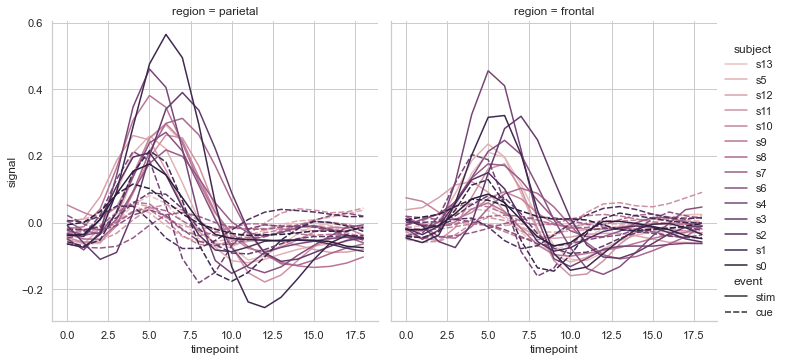

In [34]:
palette = sns.cubehelix_palette(n_colors=14, light=0.8)
sns.relplot(x='timepoint', y='signal',
            hue='subject', col='region',
            style='event', palette=palette,
            kind='line', data=fmri);

아직도 복잡함으로~    

query로 필요 정보만 추려보자  

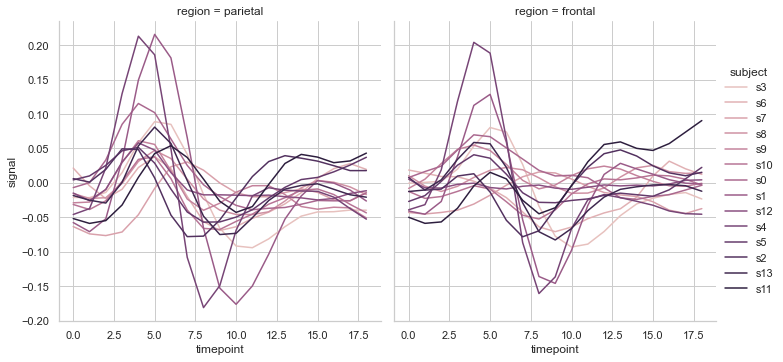

In [35]:
sns.relplot(x='timepoint', y='signal',
            hue='subject', col='region',
            palette=palette,
            kind='line', data=fmri.query("event == 'cue'"));

#### row

로우로 세분화 해보자

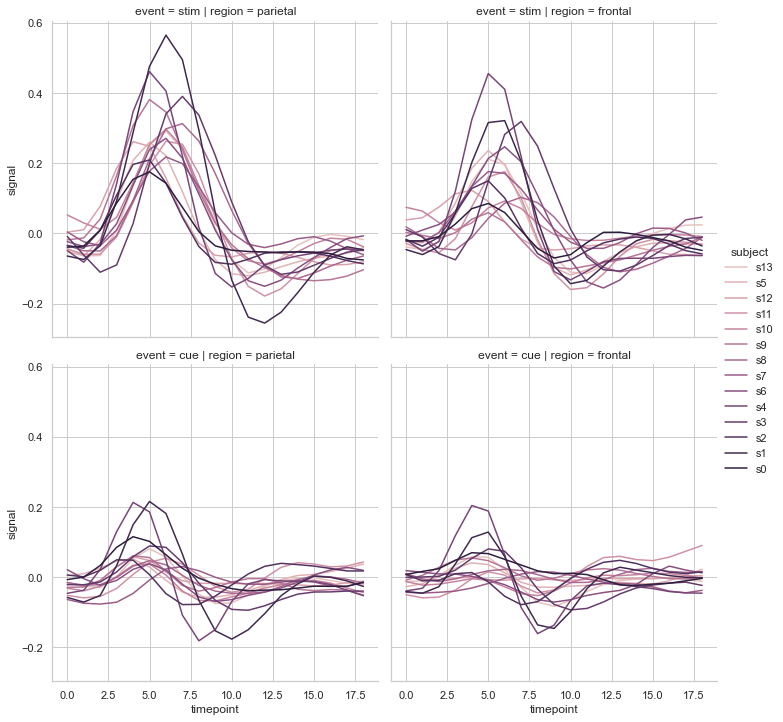

In [36]:
sns.relplot(x='timepoint', y='signal',
            hue='subject', col='region', row='event',
            palette=palette,
            kind='line', data=fmri);

#### col_wrap= : 한줄에 몇개의 col 를 넣을꺼니?!

다른 조정 방법

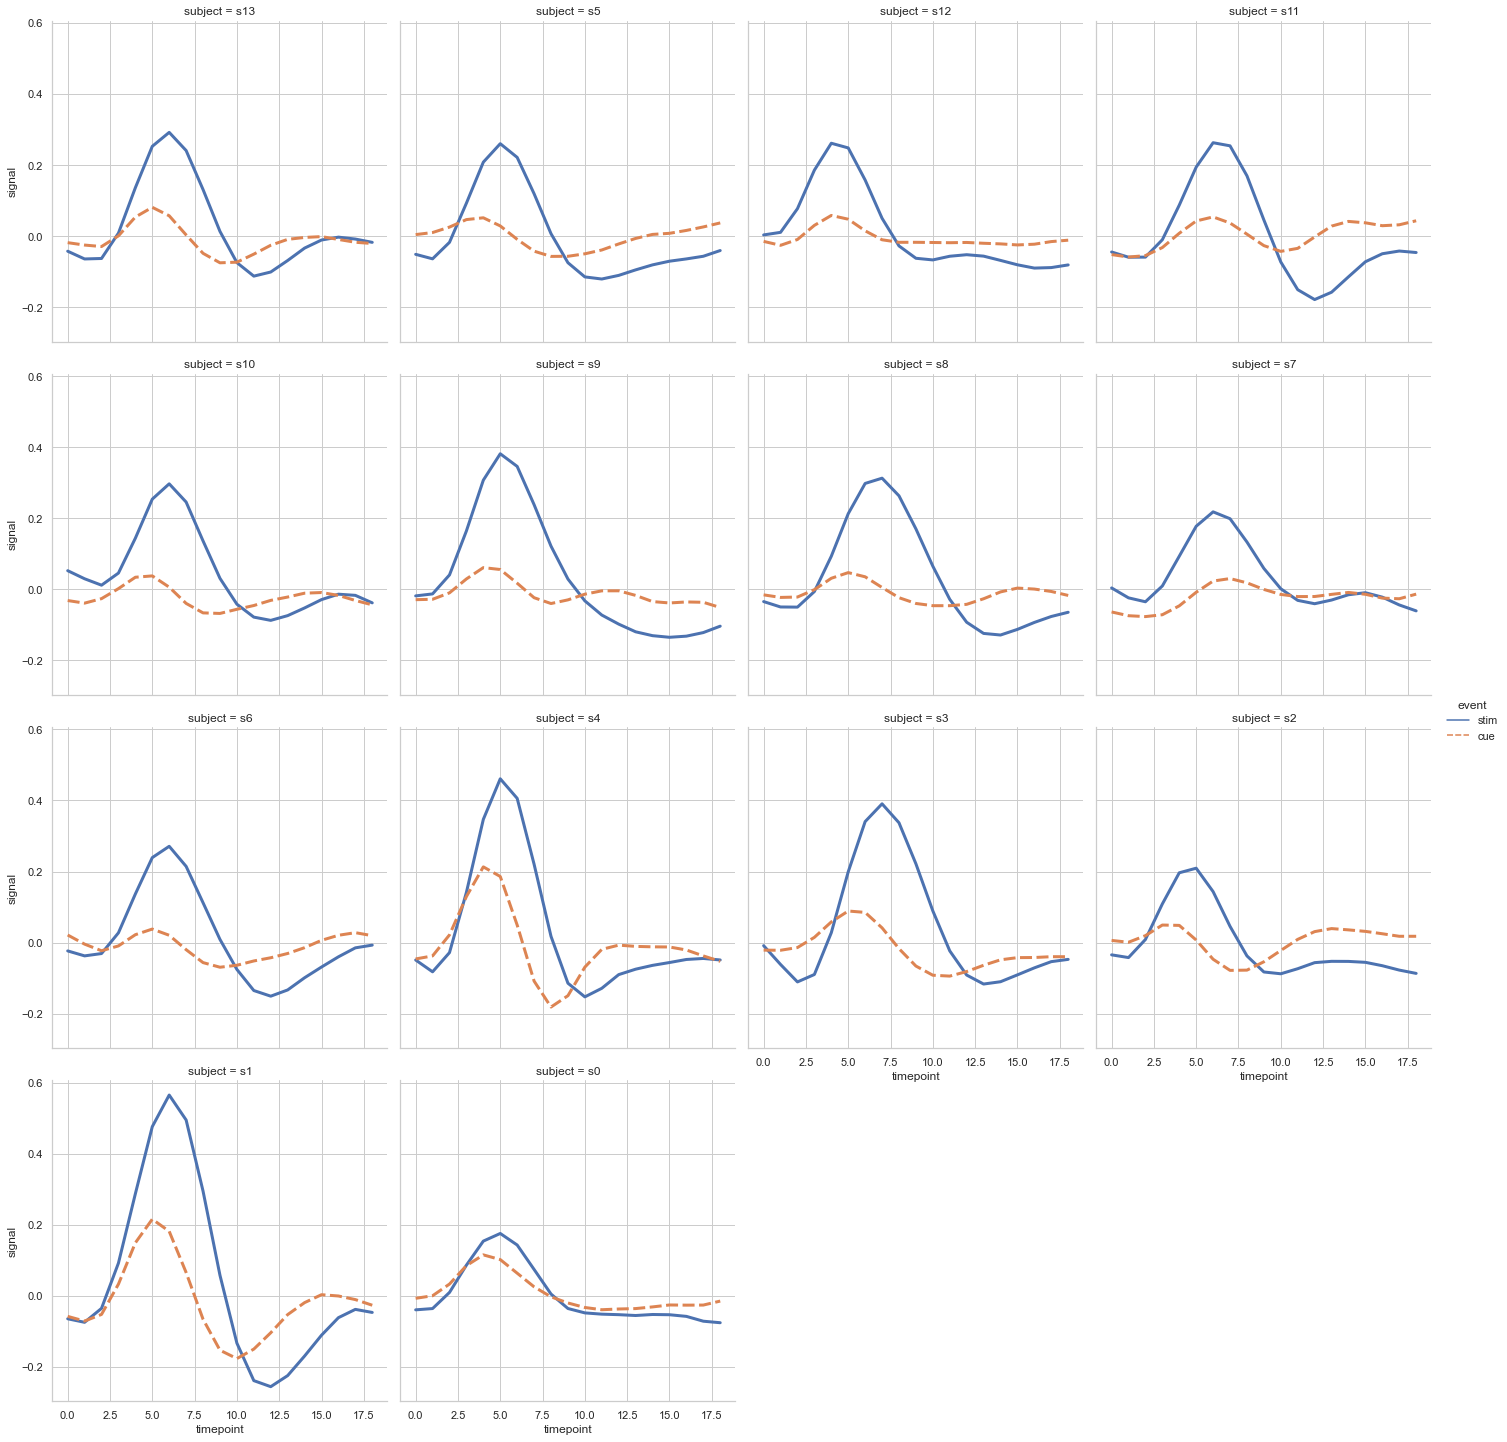

In [37]:
sns.relplot(x='timepoint', y='signal',
            hue='event', style='event',
            col='subject', col_wrap=4, linewidth=3,
            kind='line', data=fmri.query("region == 'parietal'"));

In [38]:
tdf = pd.DataFrame(np.random.randn(40, 4),
                   index=pd.date_range('2020-01-01', periods=40),
                   columns=['A','B','C','D'])
tdf

,A,B,C,D
2020-01-01,-0.267508,-1.674281,0.436079,1.953984
2020-01-02,2.081954,0.385600,0.895241,-0.111342
2020-01-03,-0.934248,-0.277653,-0.203643,1.831449
2020-01-04,-0.663836,0.204182,-0.627991,-0.550581
2020-01-05,-1.503781,-0.389838,-2.050135,1.423768
2020-01-06,-0.179207,0.868194,0.444978,1.083842
2020-01-07,-0.627529,0.165316,-1.063634,0.702747
2020-01-08,0.597643,-0.345812,-0.899578,1.084456
2020-01-09,0.284224,0.528478,0.557304,0.156131
2020-01-10,-0.562427,-0.609494,0.356293,-0.353116


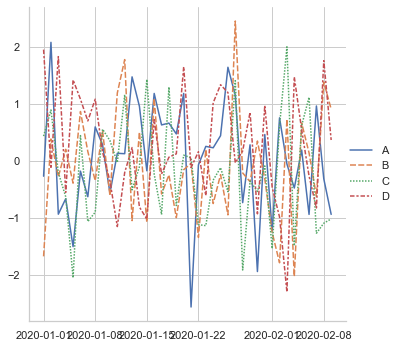

In [39]:
sns.relplot(kind='line', data=tdf);

위의 x축을 설정 해주는 방법

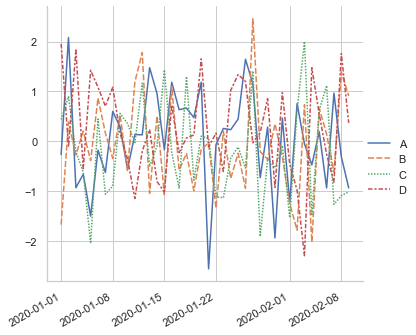

In [40]:
g = sns.relplot(kind='line', data=tdf);
g.fig.autofmt_xdate()

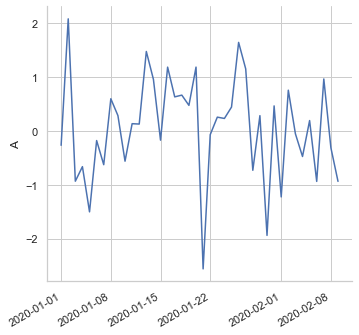

In [41]:
g = sns.relplot(kind='line', data=tdf['A']);
g.fig.autofmt_xdate()


참고문헌
* Seaborn, https://seaborn.pydata.orgl
* Igor Milovanovi, "Python Data Visualization Cookbook", Packt
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly
